In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 2)

import seaborn as sns
sns.set(font_scale=0.6)

import outlier
from utilities import *

Use scipy logsumexp().


In [2]:
df_daily = pd.read_pickle("TrainValidationData/df_daily.pkl")
df_daily_cleaned = pd.read_pickle("TrainValidationData/df_daily_cleaned.pkl")

# Baysian Change Point Detection
Use the baysian method to look for changes in the data

!pip install git+https://github.com/hildensia/bayesian_changepoint_detection.git

## Computation

Apply the Baysian Change Point Detection to each station/night. Note this takes about 30 min to processes

In [210]:
df_daily_changes = df_daily.set_index(['Station', 'Night'], append=True)

yy = df_daily_changes.groupby(level=['Station', 'Night']).transform(find_changes)

df_daily_changes[['ChangeEntry', 'ChangeExit']] = yy[['Entry', 'Exit']] 

df_daily_changes = df_daily_changes.reset_index(['Station', 'Night'])

df_daily_changes.to_pickle("TrainValidationData/df_daily_changes.pkl")

,,,Entry,Exit
Date,Station,Night,,
2013-02-01,Bondi Junction Station,Friday,1406.0,1825.0
2013-02-08,Bondi Junction Station,Friday,1529.0,1770.0
2013-02-15,Bondi Junction Station,Friday,2022.0,2189.0
2013-02-22,Bondi Junction Station,Friday,1691.0,2529.0
2013-03-01,Bondi Junction Station,Friday,1730.0,2182.0
2013-03-08,Bondi Junction Station,Friday,2287.0,2824.0
2013-03-15,Bondi Junction Station,Friday,1661.0,1871.0
2013-03-22,Bondi Junction Station,Friday,1563.0,1808.0
2013-03-29,Bondi Junction Station,Friday,708.0,745.0


## Visualisation

In [3]:
df_daily_changes = pd.read_pickle("TrainValidationData/df_daily_changes.pkl")

### Kings Cross Station

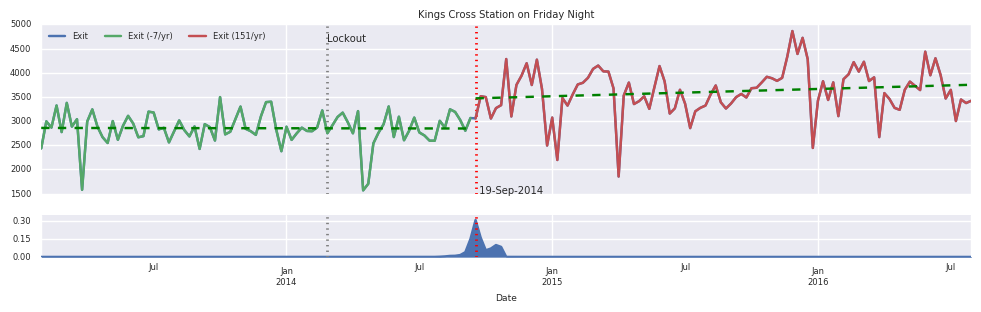

In [4]:
ts, axes = plot_bcp(df_daily_changes, "Kings Cross Station", "Friday")
mark(['19-Sep-2014'], axes)
outlier.plot(ts[:'12-Sep-2014'].Exit, ax=axes[0])
outlier.plot(ts['16-Sep-2014':].Exit, ax=axes[0])
axes[0].legend(loc='best', ncol = 3)

This indicates a change during Sept/Oct 2014, probably at 19 Sep.

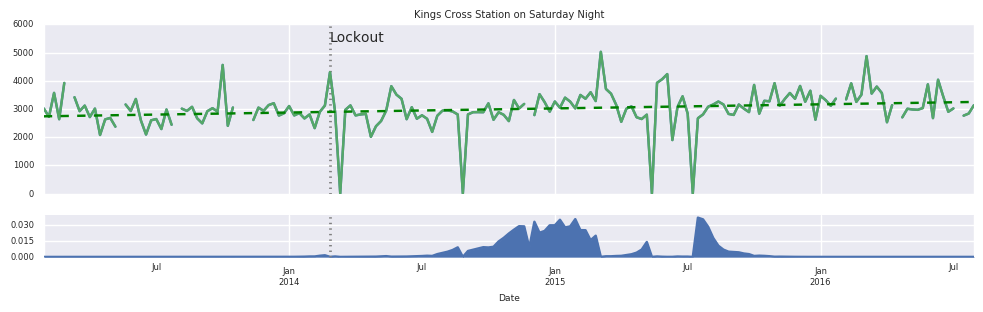

In [7]:
%matplotlib inline
ts, axes = plot_bcp(df_daily_changes, "Kings Cross Station", "Saturday")
outlier.plot(ts.Exit, ax=axes[0]);

These probabilities are very low and probably don't indicate a chage. Its more likely that the outliers are triggering this. Invesitage why there are outliers.

### Newtown Station

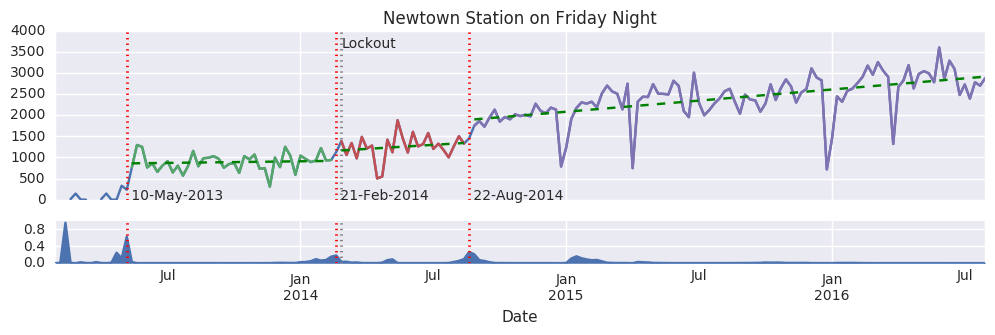

In [106]:
%matplotlib inline

df, axes = myplot("Newtown Station", "Friday")
mark(['10-May-2013', '21-Feb-2014', '22-Aug-2014'], axes)

outlier.plot(df['17-May-2013':'14-Feb-2014'].Exit, ax=axes[0])
outlier.plot(df['28-Feb-2014':'15-Aug-2014'].Exit, ax=axes[0])
outlier.plot(df['29-Aug-2014':].Exit, ax=axes[0])

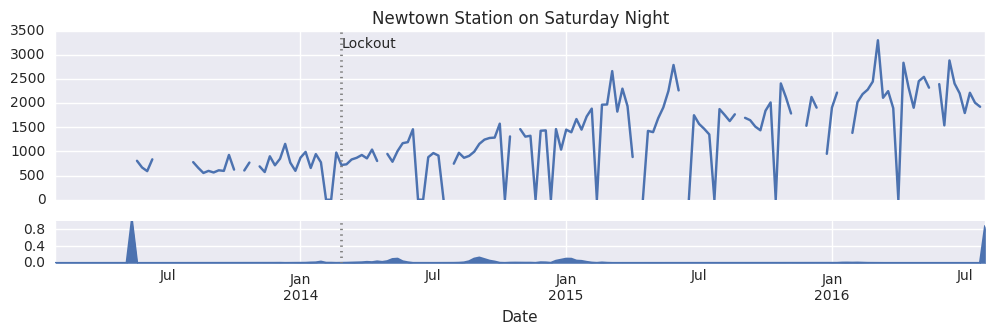

In [52]:
%matplotlib inline

df, axes = myplot("Newtown Station", "Saturday")

### Parramatta Station

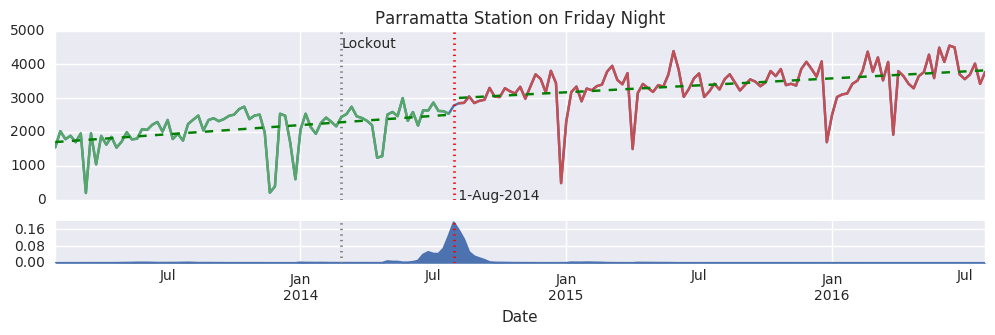

In [112]:
%matplotlib inline

df, axes = myplot("Parramatta Station", "Friday")
mark(['1-Aug-2014'], axes)

outlier.plot(df[:'25-July-2014'].Exit, ax=axes[0])
outlier.plot(df['8-Aug-2014':].Exit, ax=axes[0])

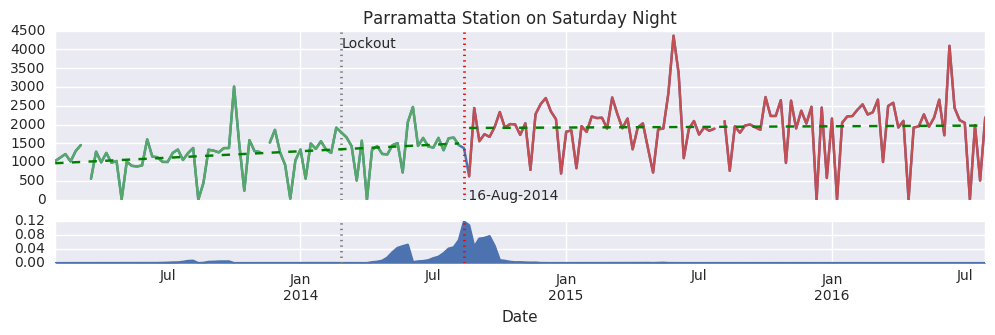

In [114]:
%matplotlib inline
df, axes = myplot("Parramatta Station", "Saturday")
mark(['16-Aug-2014'], axes)

outlier.plot(df[:'9-Aug-2014'].Exit, ax=axes[0])
outlier.plot(df['23-Aug-2014':].Exit, ax=axes[0])